# II. Plot number of bees scenting away from queen (0,0)

In [72]:
# Imports
import json
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
from matplotlib import cycler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re
import random
from sklearn.preprocessing import normalize
import math


In [85]:
# Use the data generated in position_data
with open("position_data/Q0.15_W0.0005_D0.55_T0.005_wb1.json", "r") as f:
    position_data = json.load(f)

In [86]:
len(position_data), len(position_data[0]), len(position_data[0]["worker_1"])


(10, 50, 320)

Look at the scenting timesteps of a worker. It stays still for those 6 timesteps, so all same position and bias.

In [117]:
position_data[0]["worker_1"]

[{'bias_x': 0.25,
  'bias_y': 0.9682458365518543,
  'found_queen_direction': False,
  'scenting': False,
  'x': 0.051424146988216624,
  'y': 2.2287635411263063},
 {'bias_x': 0.7071067806865474,
  'bias_y': 0.7071067806865474,
  'found_queen_direction': False,
  'scenting': False,
  'x': 0.051424146988216624,
  'y': 2.258763541126306},
 {'bias_x': 0.7071067806865474,
  'bias_y': 0.7071067806865474,
  'found_queen_direction': False,
  'scenting': False,
  'x': 0.07142414698821663,
  'y': 2.258763541126306},
 {'bias_x': 0.7071067806865474,
  'bias_y': 0.7071067806865474,
  'found_queen_direction': False,
  'scenting': False,
  'x': 0.07142414698821663,
  'y': 2.2087635411263062},
 {'bias_x': 0.7071067806865474,
  'bias_y': 0.7071067806865474,
  'found_queen_direction': False,
  'scenting': False,
  'x': 0.12142414698821663,
  'y': 2.2087635411263062},
 {'bias_x': 0.7071067806865474,
  'bias_y': 0.7071067806865474,
  'found_queen_direction': False,
  'scenting': False,
  'x': 0.12142414698

In [200]:
scenting_1_bee = []
CORRECT_SCENTING_THRESHOLD = -0.8

k = 0
for t_i, t_info in enumerate(position_data[0]["worker_1"]):
    scenting = position_data[0]["worker_1"][t_i]["scenting"]
    # print(scenting)
    if k > 100:
        break
        
    if scenting == True: 
        bias = (position_data[0]["worker_1"][t_i]["bias_x"], position_data[0]["worker_1"][t_i]["bias_y"])
        print("bias_xy: {}".format(bias))
        position = (position_data[0]["worker_1"][t_i]["x"], position_data[0]["worker_1"][t_i]["y"])
        print("position: {} \n".format(position))
        
        # Determine if scenting in queen's direction
        print(type(np.array(position)))
        r = -np.array(position)
        u_r = r / np.linalg.norm(r)
        
        similarity = np.dot(u_r, bias) # bound between -1 and 1
        
        correct_scenting = True if similarity < CORRECT_SCENTING_THRESHOLD else False
        
        k += 1
        
#         if k % 1 == 0:
            
#             plt.title(similarity)
#             plt.scatter([0], [0], c='k')
#             plt.scatter(*position, c='r')
#             plt.quiver(*position, *bias)
#             plt.quiver(*position, *u_r)
#             plt.quiver(*position, *-u_r)
#             plt.xlim([-0.5, 0.5])
#             plt.ylim([-1, 3]) 
#             plt.figure()
        
    else: 
#         print("Not scenting \n")
        pass
    
    # scenting_1_bee.append("placeholder")

# scenting_1_bee

bias_xy: (-0.7071067806865474, 0.7071067806865474)
position: (0.061424146988216625, 2.258763541126306) 

<class 'numpy.ndarray'>
bias_xy: (-0.7071067806865474, 0.7071067806865474)
position: (0.061424146988216625, 2.258763541126306) 

<class 'numpy.ndarray'>
bias_xy: (-0.7071067806865474, 0.7071067806865474)
position: (0.061424146988216625, 2.258763541126306) 

<class 'numpy.ndarray'>
bias_xy: (-0.7071067806865474, 0.7071067806865474)
position: (0.061424146988216625, 2.258763541126306) 

<class 'numpy.ndarray'>
bias_xy: (-0.7071067806865474, 0.7071067806865474)
position: (0.061424146988216625, 2.258763541126306) 

<class 'numpy.ndarray'>
bias_xy: (-0.7071067806865474, 0.7071067806865474)
position: (0.061424146988216625, 2.258763541126306) 

<class 'numpy.ndarray'>


In [105]:
# Get unit vectors
Q_pos = np.array([0,0])
W_pos = np.array([0.061424146988216625, 2.258763541126306])
negative_vector = np.array([1.1012728447454045, -0.6977546942976607])
scenting_vector = np.array([-0.7, 0.7071067806865474])

In [106]:
W_norm = math.sqrt(W_pos[0]**2 + W_pos[1]**2)
W_norm

2.2595985618146157

In [107]:
unit_vector_W = [W_pos[0]/W_norm, W_pos[1]/W_norm]
unit_vector_W

[0.027183654666025604, 0.999630456178181]

In [108]:
# Know distance between scenting and W_pos, get position of scenting 


In [109]:
# Dot product between unit vector and scenting direction
np.dot(unit_vector_W, scenting_vector)

0.6878169154781605

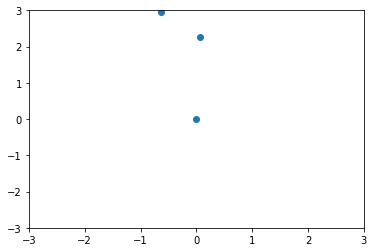

In [116]:
plt.scatter([0, 0.061424146988216625, (0.061424146988216625+-0.7)], 
            [0, 2.258763541126306, (2.258763541126306+0.7)])
plt.xlim(-3, 3); plt.ylim(-3, 3)
plt.show()

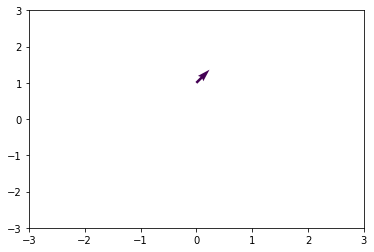

In [176]:
# plt.scatter(0,0)
plt.quiver(0, 1, 1.0, 1.0)
plt.xlim(-3, 3); plt.ylim(-3, 3)
plt.show()

Plot proportion of correctly scenting bees / total scenting bees.